**Import modules**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math
import numpy as np
import warnings

ModuleNotFoundError: No module named 'pandas'

**Download data**

In [2]:
# flight_data.csv is downloaded from https://www.kaggle.com/lampubhutia/nyc-flight-delay

flight_data = pd.read_csv(r'C:\flight_data\flight_data.csv')

**Data overview**

In [3]:
# check the first few rows

flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
# confirm that there is only one year in the data

flight_data['year'].unique()

array([2013], dtype=int64)

In [5]:
# confirm that all days in a year are in the data

len(flight_data[['year','month','day']].drop_duplicates())

365

In [6]:
# summarize the numeric columns

print('row count =', len(flight_data))
flight_data.describe()

row count = 336776


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
flight_data['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

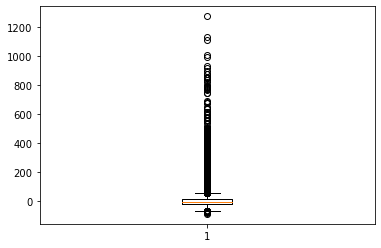

In [8]:
plt.boxplot(flight_data['arr_delay'].dropna());

**Clean up data**

In [9]:
# exclude outliers and (for our purposes) uninteresting columns

flight_arr_delays = flight_data[flight_data['arr_delay'].between(-60, 120)][['carrier', 'origin', 'dest', 'hour', 'air_time', 'distance', 'arr_delay']]

**Histogram and density of a single distribution**

In [3]:
# be cautious when setting up bins for histogram of integer values

bin_size = 5
bins = math.ceil((max(flight_arr_delays['arr_delay']) - min(flight_arr_delays['arr_delay'])) / bin_size)
plt.hist(flight_arr_delays['arr_delay'], bins=bins, edgecolor='black')
plt.xlabel('delay (minute)')
plt.ylabel('frequency')
plt.title('Histogram of arrival delays for flights departing NYC in 2013');

NameError: name 'flight_arr_delays' is not defined

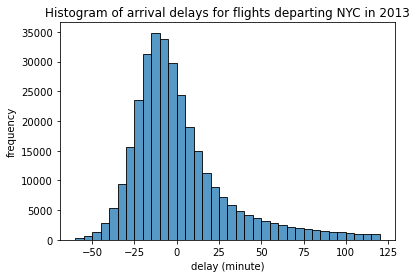

In [11]:
# Seaborn accepts binwidth as a parameter

sns.histplot(flight_arr_delays['arr_delay'], binwidth=5)
plt.xlabel('delay (minute)')
plt.ylabel('frequency')
plt.title('Histogram of arrival delays for flights departing NYC in 2013');

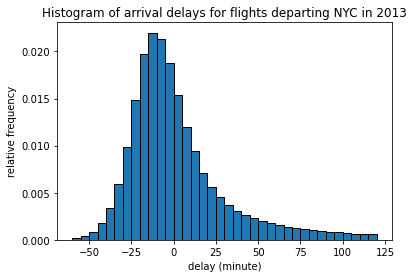

In [12]:
# show relative frequency

plt.hist(flight_arr_delays['arr_delay'], bins=bins, edgecolor='black', density=True)
plt.xlabel('delay (minute)')
plt.ylabel('relative frequency')
plt.title('Histogram of arrival delays for flights departing NYC in 2013');

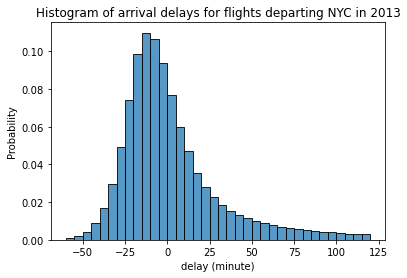

In [13]:
# show probability of each bin with Seaborn

sns.histplot(flight_arr_delays['arr_delay'], bins=bins, edgecolor='black', stat='probability')
plt.xlabel('delay (minute)')
plt.title('Histogram of arrival delays for flights departing NYC in 2013');

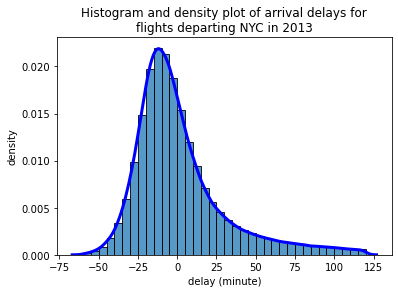

In [14]:
# density plot with Seaborn

sns.histplot(flight_arr_delays['arr_delay'], bins=bins, edgecolor='black', stat='density')
sns.kdeplot(flight_arr_delays['arr_delay'], color = 'blue', linewidth=3)
plt.xlabel('delay (minute)')
plt.ylabel('density')
plt.title('Histogram and density plot of arrival delays for\nflights departing NYC in 2013');

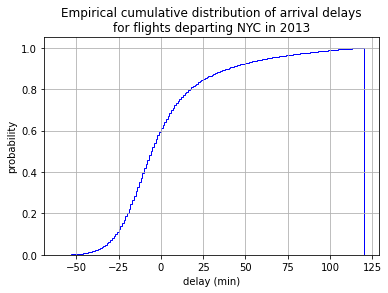

In [15]:
# empirical cumulative distribution

plt.hist(flight_arr_delays['arr_delay'], color = 'blue', cumulative=True, density=True, bins=int(max(flight_arr_delays['arr_delay']) - min(flight_arr_delays['arr_delay'])), histtype='step')
plt.xlabel('delay (min)')
plt.ylabel('probability')
plt.grid()
plt.title('Empirical cumulative distribution of arrival delays\nfor flights departing NYC in 2013');

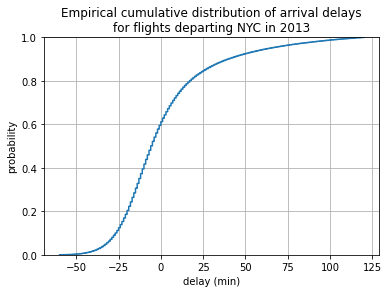

In [16]:
# empirical cumulation distribution with Seaborn

sns.ecdfplot(data=flight_arr_delays['arr_delay'])
plt.xlabel('delay (min)')
plt.ylabel('probability')
plt.grid()
plt.title('Empirical cumulative distribution of arrival delays\nfor flights departing NYC in 2013');

**Visualization of multiple distributions**

In [17]:
# Extract top five airlines with most flights
carrier_flights = flight_arr_delays.groupby('carrier')['carrier'].count()
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flight_arr_delays[flight_arr_delays['carrier'].isin(top_five)]

In [18]:
top_five

Index(['UA', 'B6', 'EV', 'DL', 'AA'], dtype='object', name='carrier')

In [19]:
top_five_flights.head()

,carrier,origin,dest,hour,air_time,distance,arr_delay
0,UA,EWR,IAH,5,227.0,1400,11.0
1,UA,LGA,IAH,5,227.0,1416,20.0
2,AA,JFK,MIA,5,160.0,1089,33.0
3,B6,JFK,BQN,5,183.0,1576,-18.0
4,DL,LGA,ATL,6,116.0,762,-25.0


C:\Users\b9xu\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


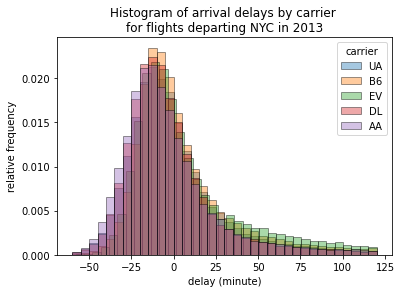

In [20]:
# show multiple distribution with histograms (not a good way)
# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['carrier'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(title = 'carrier')
plt.title('Histogram of arrival delays by carrier \nfor flights departing NYC in 2013')
plt.xlabel('delay (minute)')
plt.ylabel('relative frequency');

In [21]:
# hide warnings from now on

warnings.filterwarnings('ignore')

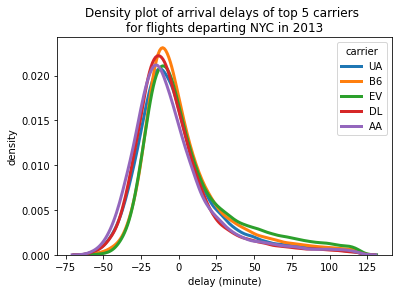

In [22]:
# show multiple distributions with density plots

# Iterate through the top five airlines
for carrier in top_five:
    # Subset to the airline
    subset = flight_arr_delays[flight_arr_delays['carrier'] == carrier]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = carrier)
    
plt.legend(title = 'carrier')
plt.title('Density plot of arrival delays of top 5 carriers \nfor flights departing NYC in 2013'); 
plt.xlabel('delay (minute)')
plt.ylabel('density');

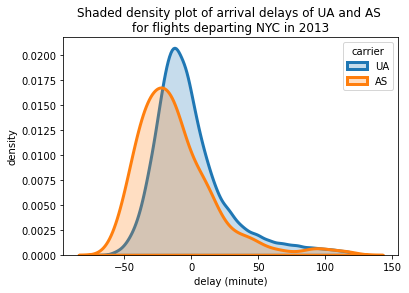

In [23]:
# show multiple distributions with density plots

for airline in ['UA', 'AS']:
    subset = flight_arr_delays[flight_arr_delays['carrier'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline);
    
plt.legend(title = 'carrier')
plt.title('Shaded density plot of arrival delays of UA and AS \nfor flights departing NYC in 2013'); 
plt.xlabel('delay (minute)'); plt.ylabel('density');

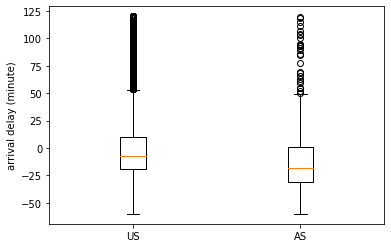

In [24]:
# box plots

ua_delays = flight_arr_delays[flight_arr_delays['carrier'] == 'UA']['arr_delay']
as_delays = flight_arr_delays[flight_arr_delays['carrier'] == 'AS']['arr_delay']
plt.boxplot([ua_delays, as_delays], labels=['US', 'AS'])
plt.ylabel('arrival delay (minute)');

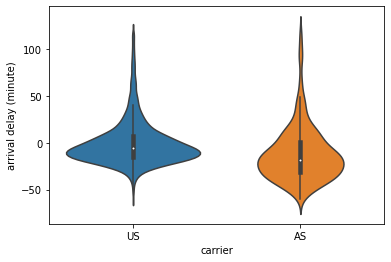

In [25]:
# violin plots

US_AS_data = flight_arr_delays[flight_arr_delays['carrier'].isin(['US', 'AS'])]
sns.violinplot(x='carrier', y='arr_delay', data=US_AS_data, inner='box')
plt.ylabel('arrival delay (minute)');

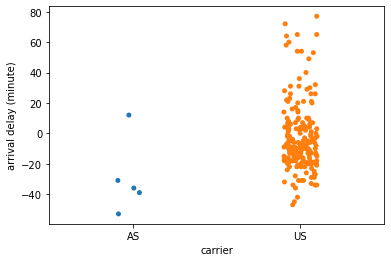

In [26]:
# strip plots

#sns.stripplot(x='carrier', y='arr_delay', data=US_AS_data)
sns.stripplot(x='carrier', y='arr_delay', data=US_AS_data.sample(frac=0.01))
plt.ylabel('arrival delay (minute)');

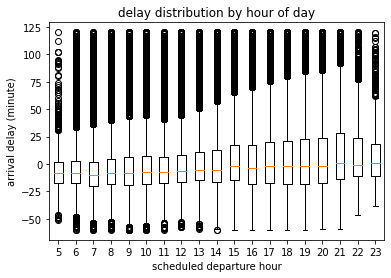

In [27]:
# distribution by hour

groupby_hour = flight_arr_delays.groupby('hour', sort=True)
arr_delay_by_hour = []
hours = []
for hour, group in groupby_hour:
    arr_delay_by_hour.append(group['arr_delay'])
    hours.append(hour)
plt.boxplot(arr_delay_by_hour, labels=hours)
plt.xlabel('scheduled departure hour')
plt.ylabel('arrival delay (minute)')
plt.title('delay distribution by hour of day');

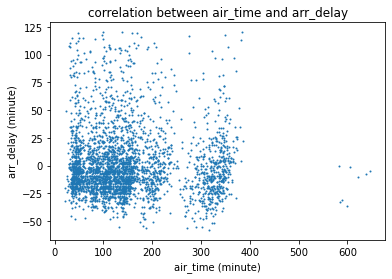

In [28]:
# correlation between air_time and arr_delay

sampled_flight_arr_delays = flight_arr_delays.sample(frac=0.01)
plt.scatter(sampled_flight_arr_delays['air_time'], sampled_flight_arr_delays['arr_delay'], s=1)
plt.xlabel('air_time (minute)')
plt.ylabel('arr_delay (minute)')
plt.title('correlation between air_time and arr_delay');

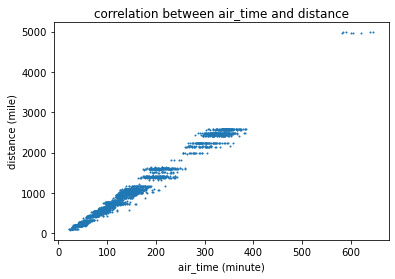

In [29]:
# correlation between air_time and distance

plt.scatter(sampled_flight_arr_delays['air_time'], sampled_flight_arr_delays['distance'], s=1)
plt.xlabel('air_time (minute)')
plt.ylabel('distance (mile)')
plt.title('correlation between air_time and distance');

**Histogram of highly skewed distributions**

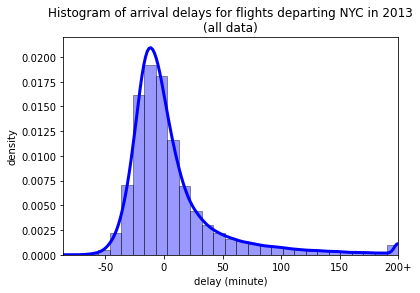

In [30]:
clipped = np.clip(flight_data['arr_delay'], min(flight_data['arr_delay']), 200)
fig, ax = plt.subplots()
fig.canvas.draw()
ax = sns.distplot(clipped, hist=True, kde=True,  
             bins=math.ceil(max(clipped - min(clipped))/10), color = 'blue',
             hist_kws={'edgecolor':'black', 'density':True},
             kde_kws={'linewidth':3})
plt.xlim(min(flight_data['arr_delay']), 200)
plt.xlabel('delay (minute)')
plt.ylabel('density')
plt.title('Histogram of arrival delays for flights departing NYC in 2013\n(all data)')
xticks = ax.get_xticks()
xticks = xticks.astype(int).astype(str)
xticks[-1] = str(xticks[-1])+'+'
ax.set_xticklabels(xticks);

**Multiple plots in one figure**

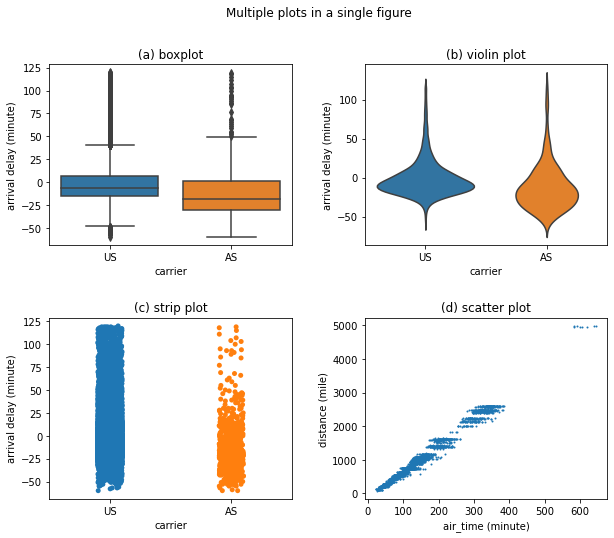

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

top_left = axes[0, 0]
sns.boxplot(x='carrier', y='arr_delay', data=US_AS_data, ax=top_left)
top_left.set_ylabel('arrival delay (minute)')
top_left.set_title('(a) boxplot')

top_right = axes[0, 1]
sns.violinplot(x='carrier', y='arr_delay', data=US_AS_data, inner=None, ax=top_right)
top_right.set_ylabel('arrival delay (minute)')
top_right.set_title('(b) violin plot')

bottom_left = axes[1, 0]
sns.stripplot(x='carrier', y='arr_delay', data=US_AS_data, ax=bottom_left)
bottom_left.set_ylabel('arrival delay (minute)')
bottom_left.set_title('(c) strip plot')

bottom_right = axes[1, 1]
bottom_right.scatter(sampled_flight_arr_delays['air_time'], sampled_flight_arr_delays['distance'], s=1)
bottom_right.set_xlabel('air_time (minute)')
bottom_right.set_ylabel('distance (mile)')
bottom_right.set_title('(d) scatter plot')

plt.suptitle('Multiple plots in a single figure');